# TUGAS 3 DATA MINING

NAMA : MUH.IKHSAN

NIM  : H071191049

## DATASET : APPLICATION TRAIN DATA SET

In [1]:
# Menyembunyikan pesan warning
# Agar tidak terganggu saja saat membaca output
import warnings
warnings.filterwarnings("ignore")

Mengambil Dataset dari Kaggle

In [2]:
!pip install kaggle
import os
os.environ["KAGGLE_USERNAME"] = "toku404"
os.environ["KAGGLE_KEY"] = "5d32a9c4e5982f55d939d5516b9172d8"

In [3]:
!kaggle datasets download -d julianocosta/home-credit

 99% 673M/682M [00:09<00:00, 56.3MB/s]
100% 682M/682M [00:09<00:00, 71.8MB/s]


In [4]:
!unzip -q /content/home-credit.zip

Import Library

In [5]:
# import the library
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

## Dataset Exploration

In [6]:
# Load Dataset
df = pd.read_csv("/content/application_train.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.shape

(307511, 122)

In [8]:
# Saya Mereduce Dataset menjadi 5000
# Karena untuk edukasi datanya terlalu besar
df = df.head(5000)
df.shape

(5000, 122)

In [9]:
df.value_counts()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE      NAME_EDUCATION_TYPE            NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE        CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE       EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LI

In [10]:
# Saya tidak menggunakan kolom target sebagai class, jadi saya membuangnya
df = df.drop(["TARGET"],axis=1)

Saya akan menggunakan kolom NAME_CONTRACT_TYPE sebagai target

In [11]:
df["NAME_CONTRACT_TYPE"].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [12]:
df['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         4516
Revolving loans     484
Name: NAME_CONTRACT_TYPE, dtype: int64

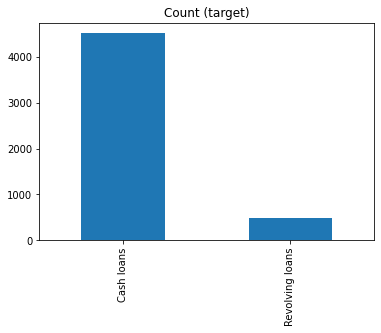

In [13]:
df['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

In [14]:
df.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,4.999000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,1692.000000,5000.0,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,2173.000000,4984.000000,4025.000000,2513.000000,2135.000000,2600.000000,1744.000000,1569.000000,2399.000000,2547.000000,2576.000000,1660.000000,...,2547.00000,2576.000000,1660.000000,2100.000000,1634.000000,2538.000000,1582.000000,2323.000000,2633.000000,4977.000000,4977.000000,4977.000000,4977.000000,5000.000000,5000.0,5000.000000,5000.0,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.0,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000
mean,102920.935000,0.406200,1.680364e+05,5.976345e+05,27047.642400,5.376322e+05,0.020979,-16026.344800,64090.334600,-4989.942400,-2969.735800,11.575650,1.0,0.819200,0.19980,0.998000,0.279800,0.055600,2.136600,2.046800,2.024800,12.068200,0.019000,0.050400,0.037800,0.0856,0.237600,0.177400,0.504951,0.514337,0.510259,0.118836,0.089322,0.978914,0.750618,0.044758,0.078257,0.151332,0.226770,0.236254,...,0.15114,0.226515,0.236152,0.068958,0.102732,0.111045,0.008383,0.027902,0.103480,1.396223,0.148885,1.383163,0.102672,-956.167200,0.0,0.709000,0.0,0.015600,0.084400,0.0,0.082400,0.004000,0.0,0.004000,0.0,0.002000,0.002200,0.000800,0.009400,0.000200,0.006200,0.000400,0.00060,0.000400,0.008786,0.008324,0.035607,0.266821,0.277225,1.875145
std,1688.918602,0.710002,9.777104e+04,4.010417e+05,14391.608732,3.686224e+05,0.014103,4326.863675,141508.266443,3535.217551,1527.209509,11.534109,0.0,0.384891,0.39989,0.044681,0.448946,0.229171,0.901833,0.510942,0.505802,3.232466,0.136538,0.218791,0.190731,0.2798,0.425655,0.382045,0.208993,0.190065,0.197196,0.109608,0.079945,0.045505,0.114766,0.081737,0.138610,0.101972,0.149015,0.162394,...,0.10215,0.149535,0.162751,0.085860,0.094340,0.115747,0.045085,0.068740,0.108533,2.236996,0.456878,2.218578,0.374674,820.606365,0.0,0.454269,0.0,0.123934,0.278015,0.0,0.275001,0.063125,0.0,0.063125,0.0,0.044681,0.046857,0.028276,0.096506,0.014142,0.078503,0.019998,0.02449,0.019998,0.095778,0.125127,0.197414,0.936475,0.627501,1.838318
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,2596.500000,4.500000e+04,0.000938,-25160.000000,-15632.000000,-20981.000000,-6228.

## Handling Missing Value

Pada tahap ini dilakukan pengananan terhadap attribut yang hilang atau tidak memiliki nilai. 

Ada beberapa cara untuk menanangani missing value ini, seperti menghapus seluruh baris, parwise deletion, menghapus kolom, atau imputasi

In [15]:
# Fungsi untuk menghitung nilai yang hilang berdasarkan kolom
def missing_values_table(df):
        # Total nilai yang hilang
        mis_val = df.isnull().sum()
        
        # Persentase nilai yang hilang
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Membuat tabel hasil
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Merubah nama kolom
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% dari Total Values'})
        
        # Mengurutkan table dengan persentase nilai hilang
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% dari Total Values', ascending=False).round(1)
        
        # Print rangkuman informasi
        print ("Dataframe memiliki " + str(df.shape[1]) + " columns.\n"      
            "Terdapat " + str(mis_val_table_ren_columns.shape[0]) +
              " columns yang memiliki missing values")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [16]:
df_mv = missing_values_table(df)
df_mv.head(10)

Dataframe memiliki 121 columns.
Terdapat 64 columns yang memiliki missing values


,Missing Values,% dari Total Values
COMMONAREA_AVG,3431,68.6
COMMONAREA_MODE,3431,68.6
COMMONAREA_MEDI,3431,68.6
NONLIVINGAPARTMENTS_MODE,3418,68.4
NONLIVINGAPARTMENTS_AVG,3418,68.4
NONLIVINGAPARTMENTS_MEDI,3418,68.4
LIVINGAPARTMENTS_MODE,3366,67.3
LIVINGAPARTMENTS_MEDI,3366,67.3
LIVINGAPARTMENTS_AVG,3366,67.3
FONDKAPREMONT_MODE,3351,67.0


Saya mengganti nilai missing value untuk numerik data dengan mean, kemudian untuk yang bertipe kategorik saya ganti dengan data dengan frekuensi tertinggi

In [17]:
# Merubah data numerik yang kosong dengan mean
df = df.fillna(df.mean())
df.isnull().sum().sum()

12171

In [18]:
# Meruabah data kategorik yang kosong dengan data frekuensi tertinggi
df = df.fillna(df.mode().iloc[0])
df.isnull().sum().sum()

0

In [19]:
# Jumlah setiap jenis kolom
df["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         4516
Revolving loans     484
Name: NAME_CONTRACT_TYPE, dtype: int64

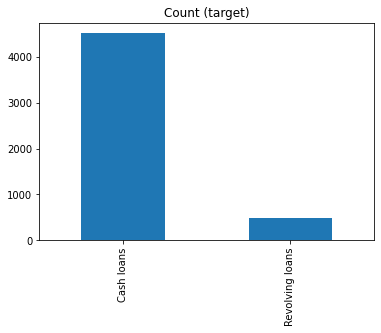

In [20]:
df["NAME_CONTRACT_TYPE"].value_counts().plot(kind='bar', title='Count (target)')

## Encoding

Menggunakan one hot encoding untuk menencode attribut target dimana saya menggunakan kolom name contract tipe

In [21]:
df['NAME_CONTRACT_TYPE'] = pd.get_dummies(df["NAME_CONTRACT_TYPE"])
df['NAME_CONTRACT_TYPE'].unique()

array([1, 0], dtype=uint8)

Menggunakan label encoding untuk attribut bertipe kategorik

In [22]:
# Membuat sendiri fungsi label encoding
def label_encode(label):
  v = 1.0
  unique = label.unique()
  for i in unique:
    label.replace(i,v, inplace=True)
    v+=1

In [23]:
df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,11.57565,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,...,0.020500,0.019300,0.000000,0.000000,reg oper account,block of flats,0.01490,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,1,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,11.57565,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,...,0.078700,0.055800,0.003900,0.010000,reg oper account,block of flats,0.07140,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.00000,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,...,0.102732,0.111045,0.008383,0.027902,reg oper account,block of flats,0.10348,Panel,No,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100006,1,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,11.57565,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,...,0.102732,0.111045,0.008383,0.027902,reg oper account,block of flats,0.10348,Panel,No,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.008786,0.008324,0.035607,0.266821,0.277225,1.875145
4,100007,1,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,11.57565,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,...,0.102732,0.111045,0.008383,0.027902,reg oper account,block of flats,0.10348,Panel,No,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
df.columns[df.dtypes == 'object']

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [25]:
n_ncode = 0
for col in df:
  if df[col].dtype == "object":
    label_encode(df[col])
    n_ncode += 1
print('%d columns telah di label encoded.' % n_ncode)

15 columns telah di label encoded.


In [26]:
df["ORGANIZATION_TYPE"]

0        1.0
1        2.0
2        3.0
3        1.0
4        4.0
        ... 
4995    10.0
4996     1.0
4997    25.0
4998    10.0
4999     1.0
Name: ORGANIZATION_TYPE, Length: 5000, dtype: float64

In [27]:
df.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE              uint8
CODE_GENDER                   float64
FLAG_OWN_CAR                  float64
FLAG_OWN_REALTY               float64
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

In [28]:
X = df.loc[:,df.columns!='NAME_CONTRACT_TYPE']
y = df.NAME_CONTRACT_TYPE

In [29]:
column_name = list(X.columns)

## Normalisasi

Melakukan normalisasi data

In [30]:
df.describe()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.0,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.0,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,102920.935000,0.903200,1.660200,1.338400,1.300000,0.406200,1.680364e+05,5.976345e+05,27047.642400,5.376322e+05,1.282000,2.075400,1.343400,2.255800,1.276200,0.020979,-16026.344800,64090.334600,-4989.942400,-2969.735800,11.575650,1.0,0.819200,0.19980,0.998000,0.279800,0.055600,3.683800,2.136600,2.046800,2.024800,3.964400,12.068200,0.019000,0.050400,0.037800,0.0856,0.237600,0.177400,10.456200,...,0.102732,0.111045,0.008383,0.027902,1.151800,1.012800,0.103480,2.621000,1.007800,1.396223,0.148885,1.383163,0.102672,-956.167200,0.0,0.709000,0.0,0.015600,0.084400,0.0,0.082400,0.004000,0.0,0.004000,0.0,0.002000,0.002200,0.000800,0.009400,0.000200,0.006200,0.000400,0.00060,0.000400,0.008786,0.008324,0.035607,0.266821,0.277225,1.875145
std,1688.918602,0.295715,0.473689,0.473213,0.458303,0.710002,9.777104e+04,4.010417e+05,14391.608732,3.685856e+05,0.723174,1.214912,0.609221,0.993259,0.838364,0.014103,4326.863675,141508.266443,3535.217551,1527.209509,6.708328,0.0,0.384891,0.39989,0.044681,0.448946,0.229171,3.656131,0.901833,0.510942,0.505802,2.158626,3.232466,0.136538,0.218791,0.190731,0.2798,0.425655,0.382045,10.818035,...,0.053920,0.082457,0.025355,0.046849,0.560374,0.145053,0.078752,0.973421,0.087981,2.231844,0.455825,2.213468,0.373811,820.606365,0.0,0.454269,0.0,0.123934,0.278015,0.0,0.275001,0.063125,0.0,0.063125,0.0,0.044681,0.046857,0.028276,0.096506,0.014142,0.078503,0.019998,0.02449,0.019998,0.089078,0.116373,0.183603,0.870959,0.583600,1.709708
min,100002.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.565000e+04,4.500000e+04,259

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(X)

print('Min : ', data_scaled.min(axis=0))
print('Max : ', data_scaled.max(axis=0))

Min :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [32]:
df = pd.DataFrame(data=data_scaled, columns= column_name)
df.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.000000,0.0,0.0,0.0,0.0,0.092623,0.146260,0.165772,0.138493,0.000000,0.00,0.00,0.00,0.0,0.249588,0.899398,0.039370,0.826128,0.659602,0.178087,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.000,0.5,0.5,0.000000,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.064728,...,0.024169,0.019300,0.000000,0.000000,0.0,0.0,0.01490,0.000000,0.0,0.090909,0.4,0.090909,0.4,0.707883,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909
1,0.000171,1.0,0.0,1.0,0.0,0.127975,0.504996,0.248254,0.490835,0.166667,0.25,0.25,0.25,0.0,0.036370,0.480951,0.037923,0.943473,0.953276,0.178087,0.0,1.0,0.0,1.0,1.0,0.0,0.058824,0.125,0.0,0.0,0.166667,0.476190,0.0,0.0,0.0,0.0,0.0,0.0,0.017544,0.316935,...,0.092785,0.055800,0.003900,0.010000,0.0,0.0,0.07140,0.166667,0.0,0.045455,0.0,0.045455,0.0,0.786708,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000342,0.0,1.0,0.0,0.0,0.021918,0.036403,0.031150,0.040733,0.000000,0.00,0.00,0.00,0.0,0.127064,0.350272,0.040452,0.796959,0.593610,0.400000,0.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.000,0.5,0.5,0.166667,0.380952,0.0,0.0,0.0,0.0,0.0,0.0,0.035088,0.530967,...,0.121118,0.111045,0.008383,0.027902,0.0,0.0,0.10348,0.333333,0.0,0.000000,0.0,0.000000,0.0,0.790057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000684,1.0,0.0,0.0,0.0,0.057271,0.108273,0.203166,0.114053,0.000000,0.00,0.00,0.50,0.0,0.098938,0.352621,0.033063,0.531338,0.608703,0.178087,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.125,0.5,0.5,0.000000,0.761905,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.530967,...,0.121118,0.111045,0.008383,0.027902,0.0,0.0,0.10348,0.333333,0.0,0.090909,0.0,0.090909,0.0,0.841061,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004393,0.002081,0.011869,0.016676,0.034653,0.170468
4,0.000855,0.0,0.0,0.0,0.0,0.050200,0.189297,0.144511,0.211813,0.000000,0.00,0.00,0.00,0.0,0.387383,0.299513,0.033066,0.794528,0.444766,0.178087,0.0,1.0,0.0,1.0,0.0,0.0,0.058824,0.000,0.5,0.5,0.333333,0.476190,0.0,0.0,0.0,0.0,1.0,1.0,0.052632,0.530967,...,0.121118,0.111045,0.008383,0.027902,0.0,0.0,0.10348,0.333333,0.0,0.000000,0.0,0.000000,0.0,0.715095,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [33]:
df.describe()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.0,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.0,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499219,0.660200,0.338400,0.300000,0.058029,0.074573,0.223530,0.183375,0.222961,0.047000,0.268850,0.085850,0.313950,0.055240,0.280022,0.523269,0.209314,0.762169,0.523164,0.178087,0.0,0.819200,0.19980,0.998000,0.279800,0.055600,0.157871,0.142075,0.523400,0.512400,0.494067,0.527057,0.019000,0.050400,0.037800,0.0856,0.237600,0.177400,0.165898,0.530967,...,0.121118,0.111045,0.008383,0.027902,0.050600,0.006400,0.103480,0.270167,0.007800,0.063465,0.029777,0.062871,0.020534,0.753692,0.0,0.709000,0.0,0.015600,0.084400,0.0,0.082400,0.004000,0.0,0.004000,0.0,0.002000,0.002200,0.000800,0.009400,0.000200,0.006200,0.000400,0.00060,0.000400,0.004393,0.002081,0.011869,0.016676,0.034653,0.170468
std,0.288852,0.473689,0.473213,0.458303,0.101429,0.051206,0.162214,0.107932,0.166819,0.120529,0.303728,0.152305,0.248315,0.167673,0.197052,0.247887,0.371535,0.168496,0.245217,0.103205,0.0,0.384891,0.39989,0.044681,0.448946,0.229171,0.215067,0.112729,0.255471,0.252901,0.359771,0.153927,0.136538,0.218791,0.190731,0.2798,0.425655,0.382045,0.189790,0.152231,...,0.063570,0.082457,0.025355,0.046849,0.186791,0.072526,0.078752,0.162237,0.087981,0.101447,0.091165,0.100612,0.074762,0.211388,0.0,0.454269,0.0,0.123934,0.278015,0.0,0.275001,0.063125,0.0,0.063125,0.0,0.044681,0.046857,0.028276,0.096506,0.014142,0.078503,0.019998,0.02449,0.019998,0.044539,0.029093,0.061201,0.054435,0.072950,0.155428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

## Find Outlier

Mengecek apakah pada dataset terdapat outlier, dengan menggunakan algoritma IQR

In [34]:
df = pd.concat([df, y], axis = 1)
df.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,...,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE
0,0.000000,0.0,0.0,0.0,0.0,0.092623,0.146260,0.165772,0.138493,0.000000,0.00,0.00,0.00,0.0,0.249588,0.899398,0.039370,0.826128,0.659602,0.178087,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.000,0.5,0.5,0.000000,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.064728,...,0.019300,0.000000,0.000000,0.0,0.0,0.01490,0.000000,0.0,0.090909,0.4,0.090909,0.4,0.707883,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,1
1,0.000171,1.0,0.0,1.0,0.0,0.127975,0.504996,0.248254,0.490835,0.166667,0.25,0.25,0.25,0.0,0.036370,0.480951,0.037923,0.943473,0.953276,0.178087,0.0,1.0,0.0,1.0,1.0,0.0,0.058824,0.125,0.0,0.0,0.166667,0.476190,0.0,0.0,0.0,0.0,0.0,0.0,0.017544,0.316935,...,0.055800,0.003900,0.010000,0.0,0.0,0.07140,0.166667,0.0,0.045455,0.0,0.045455,0.0,0.786708,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0.000342,0.0,1.0,0.0,0.0,0.021918,0.036403,0.031150,0.040733,0.000000,0.00,0.00,0.00,0.0,0.127064,0.350272,0.040452,0.796959,0.593610,0.400000,0.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.000,0.5,0.5,0.166667,0.380952,0.0,0.0,0.0,0.0,0.0,0.0,0.035088,0.530967,...,0.111045,0.008383,0.027902,0.0,0.0,0.10348,0.333333,0.0,0.000000,0.0,0.000000,0.0,0.790057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.000684,1.0,0.0,0.0,0.0,0.057271,0.108273,0.203166,0.114053,0.000000,0.00,0.00,0.50,0.0,0.098938,0.352621,0.033063,0.531338,0.608703,0.178087,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.125,0.5,0.5,0.000000,0.761905,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.530967,...,0.111045,0.008383,0.027902,0.0,0.0,0.10348,0.333333,0.0,0.090909,0.0,0.090909,0.0,0.841061,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004393,0.002081,0.011869,0.016676,0.034653,0.170468,1
4,0.000855,0.0,0.0,0.0,0.0,0.050200,0.189297,0.144511,0.211813,0.000000,0.00,0.00,0.00,0.0,0.387383,0.299513,0.033066,0.794528,0.444766,0.178087,0.0,1.0,0.0,1.0,0.0,0.0,0.058824,0.000,0.5,0.5,0.333333,0.476190,0.0,0.0,0.0,0.0,1.0,1.0,0.052632,0.530967,...,0.111045,0.008383,0.027902,0.0,0.0,0.10348,0.333333,0.0,0.000000,0.0,0.000000,0.0,0.715095,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [35]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SK_ID_CURR                    0.495938
CODE_GENDER                   1.000000
FLAG_OWN_CAR                  1.000000
FLAG_OWN_REALTY               1.000000
CNT_CHILDREN                  0.142857
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.000000
AMT_REQ_CREDIT_BUREAU_MON     0.016676
AMT_REQ_CREDIT_BUREAU_QRT     0.034653
AMT_REQ_CREDIT_BUREAU_YEAR    0.181818
NAME_CONTRACT_TYPE            0.000000
Length: 121, dtype: float64


In [36]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,...,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE
595,0.116299,0.0,0.0,0.0,0.000000,0.033703,0.094649,0.079039,0.105906,0.0,0.00,0.0,0.25,0.0,0.199567,0.480493,0.037309,0.627234,0.947816,0.178087,0.0,1.0,0.0,1.0,0.0,0.0,0.235294,0.125,0.5,0.5,0.666667,0.523810,0.0,0.0,0.0,0.0,0.0,0.0,0.192982,0.530967,...,0.111045,0.008383,0.027902,0.0,0.0,0.10348,0.333333,0.0,0.000000,0.0,0.000000,0.0,0.692427,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
850,0.165897,1.0,0.0,0.0,0.000000,0.092623,0.493236,0.258749,0.427699,0.0,0.00,0.0,0.25,0.0,0.486992,0.430765,0.039178,0.945617,0.806680,0.178087,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.125,0.5,0.5,0.833333,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.530967,...,0.111045,0.008383,0.027902,0.0,0.0,0.10348,0.333333,0.0,0.000000,0.0,0.000000,0.0,0.842349,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,1
919,0.181119,1.0,0.0,0.0,0.000000,0.071412,0.096833,0.100604,0.081466,0.0,0.00,0.0,0.25,0.0,0.486992,0.430364,0.027804,0.749249,0.809088,0.178087,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.125,0.5,0.5,0.000000,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.035088,0.530967,...,0.111045,0.008383,0.027902,0.0,0.0,0.10348,0.333333,0.0,0.000000,0.0,0.000000,0.0,0.495621,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.272727,1
994,0.196511,1.0,0.0,1.0,0.000000,0.033703,0.289296,0.223043,0.287169,0.0,0.00,0.0,0.25,0.0,0.056197,0.421598,0.036466,0.940089,0.785003,0.178087,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.125,0.5,0.5,0.666667,0.619048,0.0,0.0,0.0,0.0,0.0,0.0,0.298246,0.530967,...,0.111045,0.008383,0.027902,0.0,0.0,0.10348,0.333333,0.0,0.000000,0.0,0.000000,0.0,0.856775,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
1626,0.325979,0.0,0.0,1.0,0.000000,0.033703,0.187475,0.163984,0.185336,0.0,0.00,0.0,0.25,0.0,0.387383,0.368605,0.038624,0.568181,0.638407,0.178087,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.125,0.5,0.5,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.140351,0.530967,...,0.111045,0.008383,0.027902,0.0,0.0,0.10348,0.333333,0.0,0.000000,0.0,0.000000,0.0,0.652756,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,1
1880,0.376432,0.0,0.0,1.0,0.000000,0.045487,0.110415,0.147481,0.103870,0.0,0.50,0.0,0.25,0.0,0.117312,0.484102,0.040260,0.586102,0.957771,0.178087,0.0,1.0,0.0,1.0,0.0,0.0,0.235294,0.125,0.5,0.5,1.000000,0.523810,0

## Resampling

melakukan resamping atau kegiatan pengambilan sampel dari sampel yang telah ada.

In [37]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [38]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.60%


In [39]:
df['NAME_CONTRACT_TYPE'].unique()

array([1, 0], dtype=uint8)

Confusion matrix:
 [[ 91   6]
 [  8 895]]


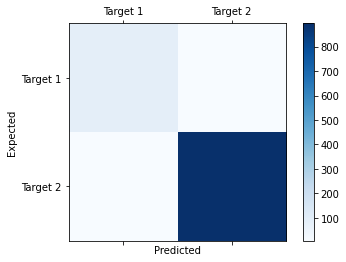

In [40]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)


labels = ['Target 1', 'Target 2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [41]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [42]:
print(Counter(y))

Counter({1: 4516, 0: 484})


1. Random Over Sampling

In [43]:
# instantiating the random oversampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)

# new class distribution 
print(Counter(y_ros))

Counter({1: 4516, 0: 4516})


2. SMOTE

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

print(Counter(y_sm))

Counter({1: 4516, 0: 4516})


3. SMOTE Tomek

In [45]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

print(Counter(y_smt))

Counter({1: 4484, 0: 4484})


4. Random Under Sampling

In [46]:
# instantiating the random undersampler
rus = RandomUnderSampler() 
# resampling X, y
X_rus, y_rus = rus.fit_resample(X, y)

# new class distribution
print(Counter(y_rus))

Counter({0: 484, 1: 484})


5. Tomek Links

In [47]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print(Counter(y_tl))

Counter({1: 4428, 0: 484})


6. Cluster Centroids

In [48]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X, y)

print(Counter(y_cc))

Counter({0: 484, 1: 484})


In [49]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = X_sm
y = y_sm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.17%


Confusion matrix:
 [[900   3]
 [ 12 892]]


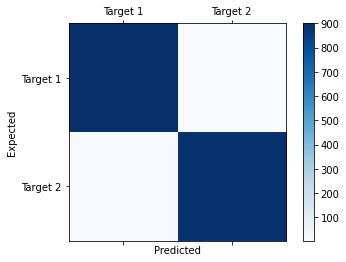

In [50]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)


labels = ['Target 1', 'Target 2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()